<a href="https://colab.research.google.com/github/sonyad19/Operation_Research-Lab-/blob/main/Project_Assignments%20Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

In [1]:
print("PROBLEM No.1 :")


print("Subject to:")
print("   x + y ≥ 4")
print("   3x + y ≥ 6")
print("   x ≥ 0, y ≥ 0")
print()

PROBLEM No.1 :
Subject to:
   x + y ≥ 4
   3x + y ≥ 6
   x ≥ 0, y ≥ 0



## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

In [3]:
import numpy as np

print("FOR THE CORNER POINTS OF THE EQUATION:")



A = np.array([[1, 1], [3, 1]])
b = np.array([4, 6])


vertex1 = np.linalg.solve(A, b)


vertex2 = (0, 6)
vertex3 = (4, 0)


corners_prob1 = [vertex2, vertex1, vertex3]

print("Corner Points are mention Below:")
for i, corner in enumerate(corners_prob1):
    print(f"  Vertex {i+1}: ({corner[0]:.1f}, {corner[1]:.1f})")

FOR THE CORNER POINTS OF THE EQUATION:
Corner Points are Mention Below:
  Vertex 1: (0.0, 6.0)
  Vertex 2: (1.0, 3.0)
  Vertex 3: (4.0, 0.0)


3. FOR THE GRAPH OF FEASIBLE REGION 


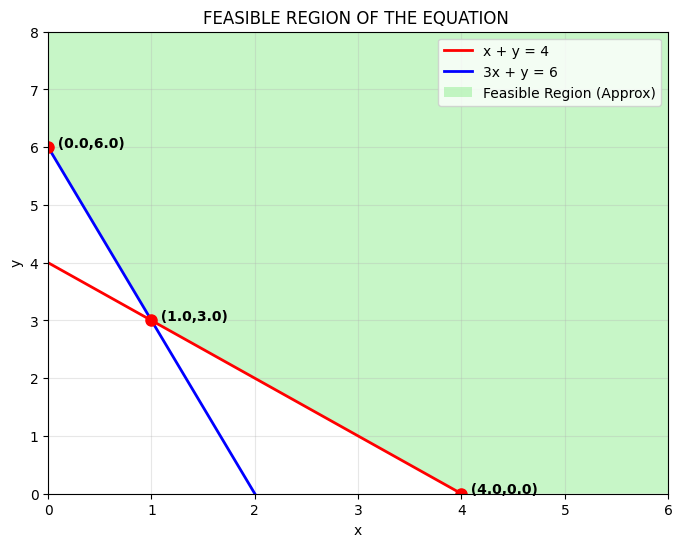

In [6]:
import matplotlib.pyplot as plt
import numpy as np

print("3. FOR THE GRAPH OF FEASIBLE REGION ")


plt.figure(figsize=(8, 6))
x = np.linspace(0, 6, 100)

plt.plot(x, 4 - x, 'r-', label='x + y = 4', linewidth=2)
plt.plot(x, 6 - 3*x, 'b-', label='3x + y = 6', linewidth=2)




points_for_fill = np.array([(0, 10), (0, 6), (1, 3), (4, 0), (10, 0), (10, 10)])

plt.fill(points_for_fill[:, 0], points_for_fill[:, 1], 'lightgreen', alpha=0.5, label='Feasible Region (Approx)')

if corners_prob1:
    corners_array = np.array(corners_prob1)
    plt.plot(corners_array[:, 0], corners_array[:, 1], 'ro', markersize=8)
    for i, (x_val, y_val) in enumerate(corners_prob1):
        plt.text(x_val, y_val, f'  ({x_val:.1f},{y_val:.1f})', fontweight='bold')


plt.xlim(0, 6)
plt.ylim(0, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('FEASIBLE REGION OF THE EQUATION ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
print("4. MAXIMIZING P = 3x + 2y:\n")


max_P = -float('inf')
best_corner = None

print("Maximizing objective function at each corner:")

for corner in corners_prob1:
    x, y = corner
    P = 3*x + 2*y
    print(f"  Corner ({x:.1f}, {y:.1f}): P = 3({x:.1f}) + 2({y:.1f}) = {P:.1f}")

    if P > max_P:
        max_P = P
        best_corner = corner

print(f"\n Maximum P = {max_P:.1f}")
print(f"  At corner: ({best_corner[0]:.1f}, {best_corner[1]:.1f})")

4. MAXIMIZING P = 3x + 2y:

Maximizing objective function at each corner:
  Corner (0.0, 6.0): P = 3(0.0) + 2(6.0) = 12.0
  Corner (1.0, 3.0): P = 3(1.0) + 2(3.0) = 9.0
  Corner (4.0, 0.0): P = 3(4.0) + 2(0.0) = 12.0

 Maximum P = 12.0
  At corner: (0.0, 6.0)


In [10]:
import sympy as sp

x, y = sp.symbols('x y', real=True)


print("Slack variable form:")
print("x + y - s1 = 4")
print("3x + y - s2 = 6")
print("where s1, s2 ≥ 0\n")


eq1 = sp.Eq(x + y, 4)
eq2 = sp.Eq(3*x + y, 6)


points = [
    sp.solve([eq1, eq2], (x, y)),
    sp.solve([eq1, sp.Eq(x, 0)], (x, y)),
    sp.solve([eq2, sp.Eq(x, 0)], (x, y)),
    sp.solve([eq1, sp.Eq(y, 0)], (x, y)),
    sp.solve([eq2, sp.Eq(y, 0)], (x, y))
]


feasible = []
for sol in points:
    if sol:
        a, b = float(sol[x]), float(sol[y])
        if a >= 0 and b >= 0 and a + b >= 4 and 3*a + b >= 6:
            feasible.append((a, b))

print("Corner feasible points:")
for p in feasible:
    print(p)


Slack variable form:
x + y - s1 = 4
3x + y - s2 = 6
where s1, s2 ≥ 0

Corner feasible points:
(1.0, 3.0)
(0.0, 6.0)
(4.0, 0.0)


In [11]:
from scipy.optimize import linprog

print("6. SCIPY SOLVER SOLUTION:\n")



c = [-3, -2]


A_ub = [[-1, -1],
        [-3, -1]]
b_ub = [-4, -6]


bounds = [(0, None), (0, None)]


res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

print("Solver results:")
print(f"  Success: {res.success}")
print(f"  Status: {res.status}")
print(f"  Message: {res.message}")

if res.success:
    x_opt, y_opt = res.x
    P_opt = -res.fun
    print(f"\n Optimal x: {x_opt:.6f}")
    print(f" Optimal y: {y_opt:.6f}")
    print(f" Maximum P: {P_opt:.6f}")
else:
    print("\nSolver failed to find an optimal solution.")
    print("This is expected as the feasible region for this problem is unbounded, and the objective function can be infinitely increased.")


6. SCIPY SOLVER SOLUTION:

Solver results:
  Success: False
  Status: 3
  Message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)

Solver failed to find an optimal solution.
This is expected as the feasible region for this problem is unbounded, and the objective function can be infinitely increased.


In [14]:
import sympy as sp

# Defining variables
x, y = sp.symbols('x y', real=True)

# Objective function
objective = 240*x + 150*y

# Constraints
c1 = sp.Eq(22*x + 11*y, 770)   # production hours
c2 = sp.Eq(90*x + 75*y, 3750)  # material

print("Objective function :")
print(sp.latex(objective))

print("\nConstraints in LaTeX:")
print(sp.latex(c1))
print(sp.latex(c2))

Objective function :
240 x + 150 y

Constraints in LaTeX:
22 x + 11 y = 770
90 x + 75 y = 3750


In [ ]:
import numpy as np

print("2. FINDING CORNER POINTS:")


# Define constraint equations
# 22x + 11y = 770  -> y = (770 - 22x)/11
# 90x + 75y = 3750 -> y = (3750 - 90x)/75


corners = []


corners.append((0, 0))

# x-axis intersections
corners.append((770/22, 0))
corners.append((3750/90, 0))

# y-axis intersections
corners.append((0, 770/11))
corners.append((0, 3750/75))

# Intersection of two constraints
A = np.array([[22, 11], [90, 75]])
b = np.array([770, 3750])
intersection = np.linalg.solve(A, b)
corners.append(tuple(intersection))


def is_feasible(x, y):
    return (22*x + 11*y <= 770 + 1e-10 and
            90*x + 75*y <= 3750 + 1e-10 and
            x >= -1e-10 and y >= -1e-10)

feasible_corners = [corner for corner in corners if is_feasible(*corner)]
feasible_corners = list(set([(round(x, 2), round(y, 2)) for x, y in feasible_corners]))

print("Feasible corner points:")
for i, (x, y) in enumerate(feasible_corners):
    print(f"  Corner {i+1}: ({x}, {y})")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("\n3. GRAPHING FEASIBLE REGION:")
print("=" * 50)


x_vals = np.linspace(0, 40, 400)
y_vals = np.linspace(0, 60, 600)
X, Y = np.meshgrid(x_vals, y_vals)


constraint1 = 22*X + 11*Y <= 770
constraint2 = 90*X + 75*Y <= 3750
non_negativity = (X >= 0) & (Y >= 0)


feasible_region = constraint1 & constraint2 & non_negativity


plt.figure(figsize=(8, 6))
plt.imshow(feasible_region, extent=(0, 40, 0, 60), origin='lower', cmap='Greens', alpha=0.5)


plt.plot(x_vals, (770 - 22*x_vals)/11, label='22x + 11y = 770', color='red')
plt.plot(x_vals, (3750 - 90*x_vals)/75, label='90x + 75y = 3750', color='blue')



feasible_corners_array = np.array(feasible_corners)
plt.plot(feasible_corners_array[:, 0], feasible_corners_array[:, 1], 'ro', markersize=8, label='Corner Points')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region')
plt.legend()
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(0, 60)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
print("\n4. MAXIMIZING OBJECTIVE FUNCTION:")
print("=" * 40)

# Objective function: P = 240x + 150y

max_P = -float('inf')
best_corner = None

print("Evaluating objective function at each feasible corner point:")
for corner in feasible_corners:
    x_val, y_val = corner
    P = 240 * x_val + 150 * y_val
    print(f"  Corner ({x_val:.2f}, {y_val:.2f}): P = 240({x_val:.2f}) + 150({y_val:.2f}) = {P:.2f}")

    if P > max_P:
        max_P = P
        best_corner = corner

print(f"\nMaximum P = {max_P:.2f}")
print(f" at corner: ({best_corner[0]:.2f}, {best_corner[1]:.2f})")


In [15]:
import sympy as sp

x, y = sp.symbols('x y', real=True)

print("5. SLACK VARIABLES AND CORNER POINTS:")


print("Slack variable form:")
print("22x + 11y + s1 = 770")
print("90x + 75y + s2 = 3750")
print("where s1, s2 ≥ 0\n")

eq1 = sp.Eq(22*x + 11*y, 770)
eq2 = sp.Eq(90*x + 75*y, 3750)

points = [
    sp.solve([eq1, eq2], (x, y)),
    sp.solve([eq1, sp.Eq(x, 0)], (x, y)),
    sp.solve([eq2, sp.Eq(x, 0)], (x, y)),
    sp.solve([eq1, sp.Eq(y, 0)], (x, y)),
    sp.solve([eq2, sp.Eq(y, 0)], (x, y))
]

feasible = []
for sol in points:
    if sol:
        a, b = float(sol[x]), float(sol[y])
        if a >= 0 and b >= 0 and 22*a + 11*b <= 770 and 90*a + 75*b <= 3750:
            feasible.append((a, b))

print("Corner (feasible) points:")
for p in feasible:
    print(p)

5. SLACK VARIABLES AND CORNER POINTS:
Slack variable form:
22x + 11y + s1 = 770
90x + 75y + s2 = 3750
where s1, s2 ≥ 0

Corner (feasible) points:
(25.0, 20.0)
(0.0, 50.0)
(35.0, 0.0)


In [ ]:
from scipy.optimize import linprog

print("6. SCIPY SOLVER SOLUTION:\n")



A_ub = [[22, 11],
        [90, 75]]
b_ub = [770, 3750]


bounds = [(0, None), (0, None)]


res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')


print("Solver results:\n")
print(f"  Success: {res.success}")
print(f"  Status: {res.status}")
print(f"  Message: {res.message}")

if res.success:
    x_opt, y_opt = res.x
    P_opt = -res.fun
    print(f"\n Optimal x: {x_opt:.6f}")
    print(f" Optimal y: {y_opt:.6f}")
    print(f" Maximum P: {P_opt:.6f}")
else:
    print("\nSolver failed to find an optimal solution.")